# **E7: Detección de Anomalías con One-Class SVM**  

## **Objetivo**  
Implementar clasificador **One-Class SVM** para detectar anomalías en datos de consumo energético y meteorología.  

## **Datos de entrada**  
Un dataset con las siguientes columnas:  
- **Consumo Energía (kWh)**  
- **Generación FV (kWh)**  
- **Temperatura (°C)**  
- **Radiación Solar (W/m²)**  

---

# **Pasos a seguir**  

## 1. Cargar y visualizar los datos  

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

from sklearn.svm import OneClassSVM  

# Cargar dataset
df = pd.read_csv("data/m4_datos_energia_canarias.csv", usecols=range(1, 6) )

df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')
# Ver las primeras filas
print(df.head())



            Consumo Energía (kWh)  Generación FV (kWh)  Temperatura (°C)  \
Fecha                                                                      
2023-01-01             259.514697           164.004193         20.477757   
2023-01-02             299.305789           173.408325         18.215363   
2023-01-03             307.509279           170.269137         21.074604   
2023-01-04             316.606347           171.587572         16.938845   
2023-01-05             299.377762           158.578316         22.488135   

            Radiación Solar (W/m²)  
Fecha                               
2023-01-01              496.039170  
2023-01-02              504.088217  
2023-01-03              400.357468  
2023-01-04              546.224484  
2023-01-05              517.902633  


In [1]:
df.describe()

NameError: name 'df' is not defined

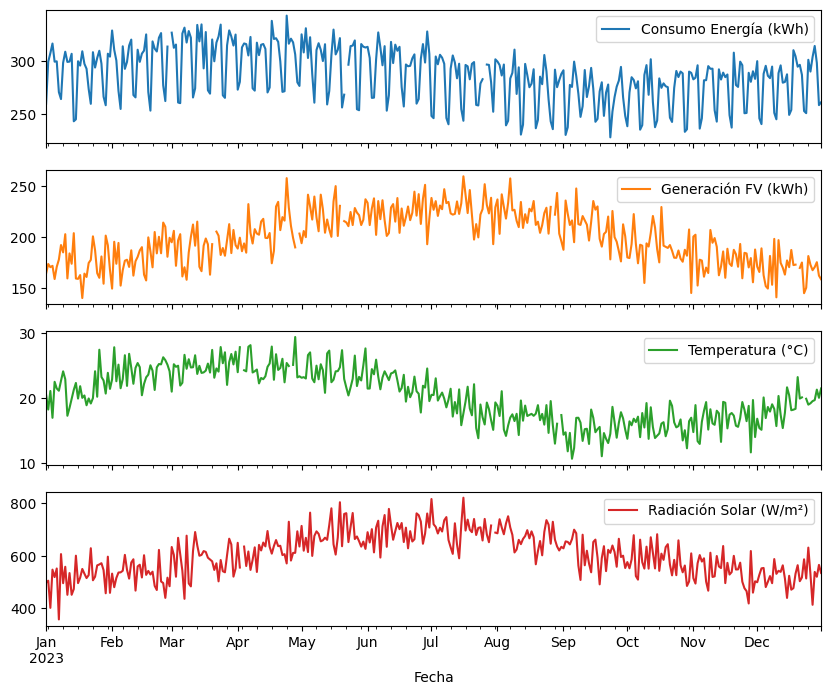

In [ ]:
# Visualizar las variables clave
df.plot(subplots=True, figsize=(10, 8))
plt.show()

---

## 2. Preprocesamiento  
- **Rellenar valores nulos**  
- **Normalizar datos** para mejorar la detección  

In [ ]:
# Rellenar valores nulos
df.interpolate(inplace=True)

# Normalización Min-Max
df_normalized = (df - df.min()) / (df.max() - df.min())

# Eliminamos series con baja correlación
df_normalized = df_normalized[['Consumo Energía (kWh)','Temperatura (°C)']]

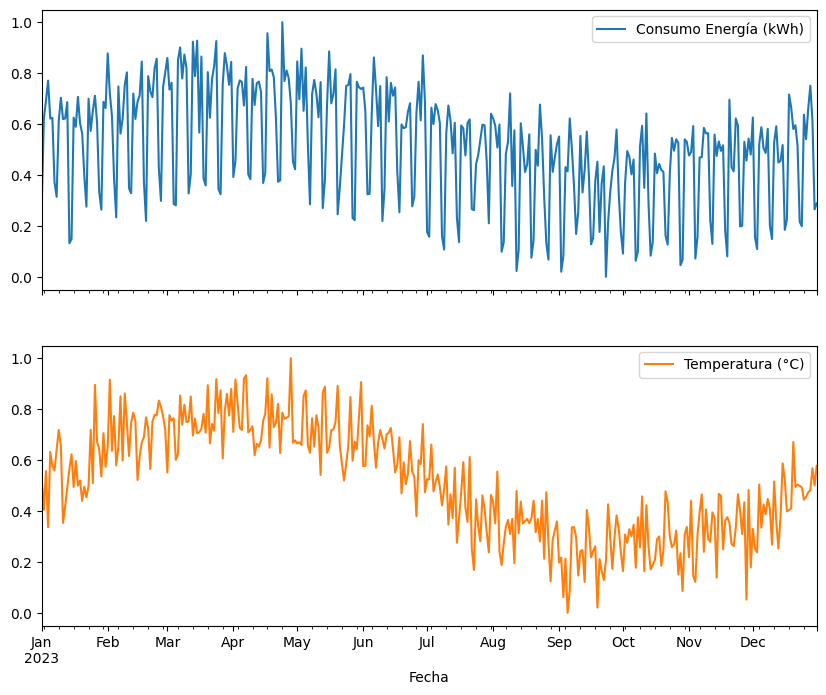

In [ ]:
# Visualizar las variables clave
df_normalized.plot(subplots=True, figsize=(10, 8))
plt.show()

---

## 3. Entrenar One-Class SVM

In [ ]:
# Inicializar modelo One-Class SVM
model = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.15)

# Entrenar el modelo y predecir anomalías
df["Anomaly"] = model.fit_predict(df_normalized[['Consumo Energía (kWh)','Temperatura (°C)']])

# Mostrar conteo de anomalías detectadas
print(df["Anomaly"].value_counts())


Anomaly
 1    311
-1     54
Name: count, dtype: int64


In [ ]:
# Contar el número total de anomalías detectadas
num_anomalies = (df["Anomaly"] == -1).sum()
print(f"Número total de anomalías detectadas: {num_anomalies}")


Número total de anomalías detectadas: 54


---

## 4. Visualizar anomalías  

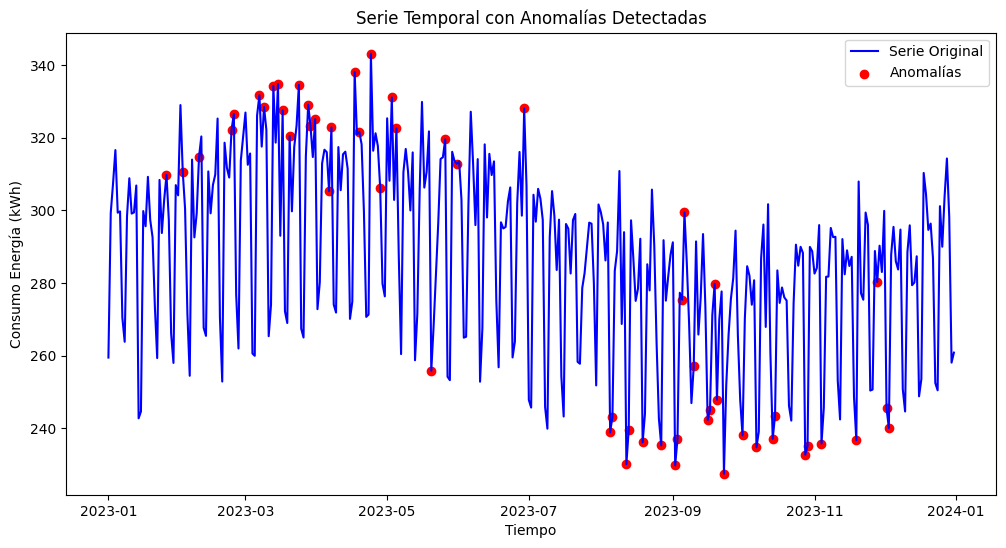

In [ ]:
# 5️⃣ Gráfico de línea con anomalías
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Consumo Energía (kWh)"], label="Serie Original", color="blue")
plt.scatter(df.index[df["Anomaly"] == -1], df["Consumo Energía (kWh)"][df["Anomaly"] == -1],
            color='red', label='Anomalías', marker='o')
plt.xlabel("Tiempo")
plt.ylabel("Consumo Energía (kWh)")
plt.title("Serie Temporal con Anomalías Detectadas")
plt.legend()
plt.show()

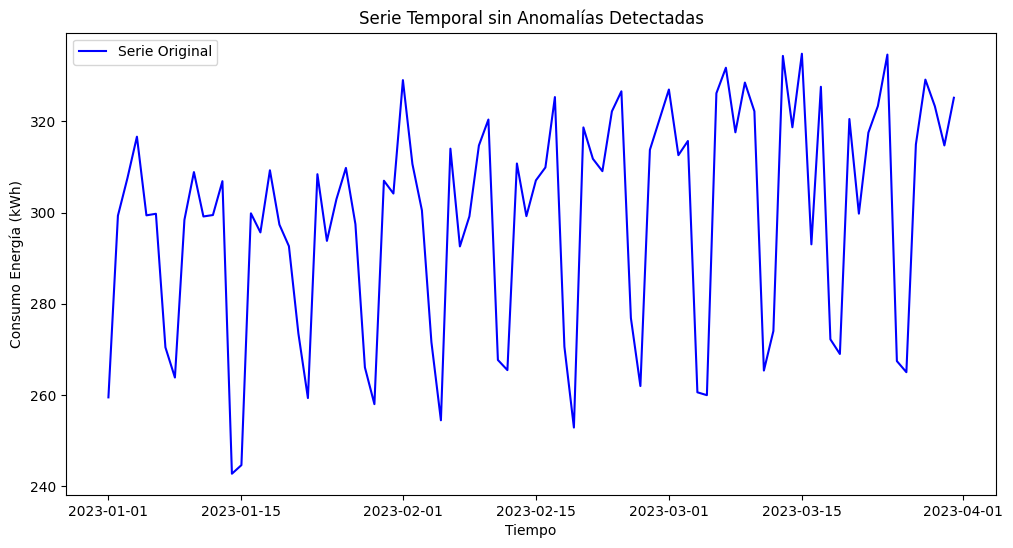

In [ ]:
# Aumentamos el zoom en el primer trimestre
plot_df = df[df.index.month < 4]
# 5️⃣ Gráfico de línea con anomalías
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df["Consumo Energía (kWh)"], label="Serie Original", color="blue")
plt.xlabel("Tiempo")
plt.ylabel("Consumo Energía (kWh)")
plt.title("Serie Temporal sin Anomalías Detectadas")
plt.legend()
plt.show()

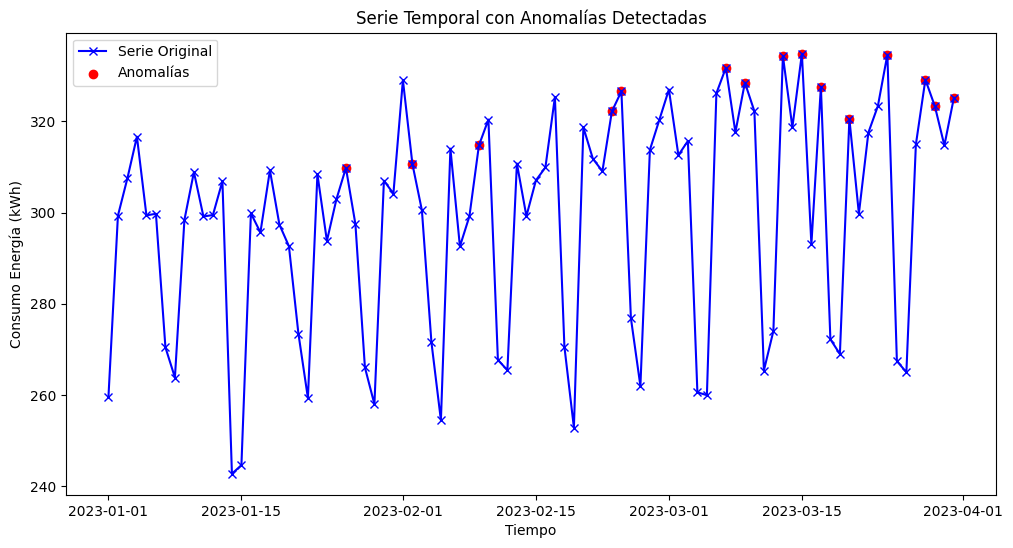

In [ ]:
# 5️⃣ Gráfico de línea con anomalías
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df["Consumo Energía (kWh)"], label="Serie Original", color="blue", marker="x")
plt.scatter(plot_df.index[plot_df["Anomaly"] == -1], plot_df["Consumo Energía (kWh)"][plot_df["Anomaly"] == -1],
            color='red', label='Anomalías', marker='o')
plt.xlabel("Tiempo")
plt.ylabel("Consumo Energía (kWh)")
plt.title("Serie Temporal con Anomalías Detectadas")
plt.legend()
plt.show()

--

## 5. Optimizar One-Class SVM

In [ ]:
# Ajustar hiperparámetros y entrenar modelo
gamma_values = [0.01, 0.1, 1]  # Controla la sensibilidad del kernel RBF
nu_values = [0.01, 0.10, 0.25]   # Proporción estimada de anomalías en los datos

for gamma in gamma_values:
    for nu in nu_values:
        model = OneClassSVM(kernel="rbf", gamma=gamma, nu=nu)
        df["Anomaly"] = model.fit_predict(df_normalized)
        
        num_anomalies = (df["Anomaly"] == -1).sum()
        print(f"Gamma: {gamma}, Nu: {nu} → Anomalías detectadas: {num_anomalies}")


Gamma: 0.01, Nu: 0.01 → Anomalías detectadas: 4
Gamma: 0.01, Nu: 0.1 → Anomalías detectadas: 38
Gamma: 0.01, Nu: 0.25 → Anomalías detectadas: 93
Gamma: 0.1, Nu: 0.01 → Anomalías detectadas: 2
Gamma: 0.1, Nu: 0.1 → Anomalías detectadas: 36
Gamma: 0.1, Nu: 0.25 → Anomalías detectadas: 91
Gamma: 1, Nu: 0.01 → Anomalías detectadas: 4
Gamma: 1, Nu: 0.1 → Anomalías detectadas: 36
Gamma: 1, Nu: 0.25 → Anomalías detectadas: 92


### Explicación de los parámetros de One-Class SVM

- gamma: Define la influencia de cada punto en el kernel RBF.
  - Valores bajos → Generaliza más (menos detecciones).
  - Valores altos → Detecta anomalías más agresivamente.
- nu: Define la proporción esperada de anomalías.
  - Valores bajos → Menos anomalías detectadas.
  - Valores altos → Más puntos considerados anómalos.

---

# **Conclusión**  
- Los puntos rojos en la gráfica representan anomalías detectadas.  
- Comparar con Isolation Forest y otros métodos para evaluar diferencias.
- Probar a visualizar otros rangos para completar el análisis del detector